# Numerical Exercises 5

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

csv_path = "./CSV/"

The goal of this exercise is to sample the Ground State (GS) and one excited state orbitals of an Hydrogen atom, alongside their expectation value for the radius, using the Metropolis algorithm. These orbitals represents the probability densities associated to the position $\vec{r}$ of the electron at a given time $t$ and are mathematically described by the eigenfunctions modulus-squared (wave functions modulus-squared) of the Hydrogen Hamiltonian. These wave functions can be computed analytically. They can, in fact, be expressed in terms of spherical harmonics and generalized Laguerre polynomials; to group them, they are also labelled with three quantum numbers, $n,l,m$. In particular, for the state with $n=1,l=0,m=0$ (GS) and $n=2,l=1,m=0$ one obtains: $$\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0}$$ $$\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)$$
Where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius (in the rest of the notebook I will use natural units, which allow me to set $a_0=1$). Furthermore, it is also possible to compute the expectation (average) value of the radius in these orbitals, given by: $$\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0\quad\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0$$
 

As I said, we want to exploit the Metropolis algorithm to sample the probability distributions given by $|\Psi(r,\theta,\phi)|^2$. This algorithm allows to sample any probability density $p(x)$ in the asymptotic limit via subsequential sampling of a simpler probability distribution as follows:

1. Consider the current position $x_n$ (in the first step $x_0$ externally fixed).
2. Generate $x'$ from $T(x'|x_n)$, where $T(x|y)$ is an arbitrary PDF (transition probability).
3. Evaluate $\alpha = A(x'|x_n)=min(1, \frac{p(x')}{p(x_n)})$.
4. Accept the move $x_n\rightarrow x'$ with probability $\alpha$.
5. Repeat.

It is also important to note that, when generating $x'$, a step $\delta$ must be fixed (it represents, for example, the maximum displacement from the actual position $x_n$), known as the Metropolis step. The choice of $\delta$ should let the algorithm perform balanced steps, i.e. not too large to be constantly rejected (thus reducing efficiency) and not too small to prevent loss of exploration (and also high correlation between consequent steps); an empirical rule to correctly tune $\delta$ is to have an acceptance rate of around $50\%$ (i.e. $A(x|y)\approx 50\%$).

Knowing the overall algorithm behavior, we can adapt it to this exercise by using $p(x)\leadsto |\Psi(\vec{r})|^2$ and $T(x|y)$ chosen from two different PDFs:

- Uniform transition probability between $-\delta$ and $\delta$ in each cartesian direction.
- Gaussian transition probability with $\sigma = \delta$ in each cartesian direction.

## Exercise 5.1



Before starting with the actual simulation of the orbitals, the system must be equilibrated, since the externally fixed starting point $x_0$ could a priori be very far from the highest probability region, then leading to a biased $\langle r \rangle$ evaluation. This process is also very useful to determine another important simulation parameter, i.e. the number of steps per block (again we are using data blocking to compute $\langle r \rangle$); this is important since one significative drawback of the Metropolis algorithm lies in the high correlations introduced between near steps. 

To fullfil this double objective I started the simulation quite far-away from the expectation value of the radius (which again roughly speaking is the average position value), thus in a low probability region (I chose $10$ times $\langle r \rangle$ for both orbitals); I then simulated the system for $10^3$ steps with blocks of $1$ step each and monitored the instant radius.

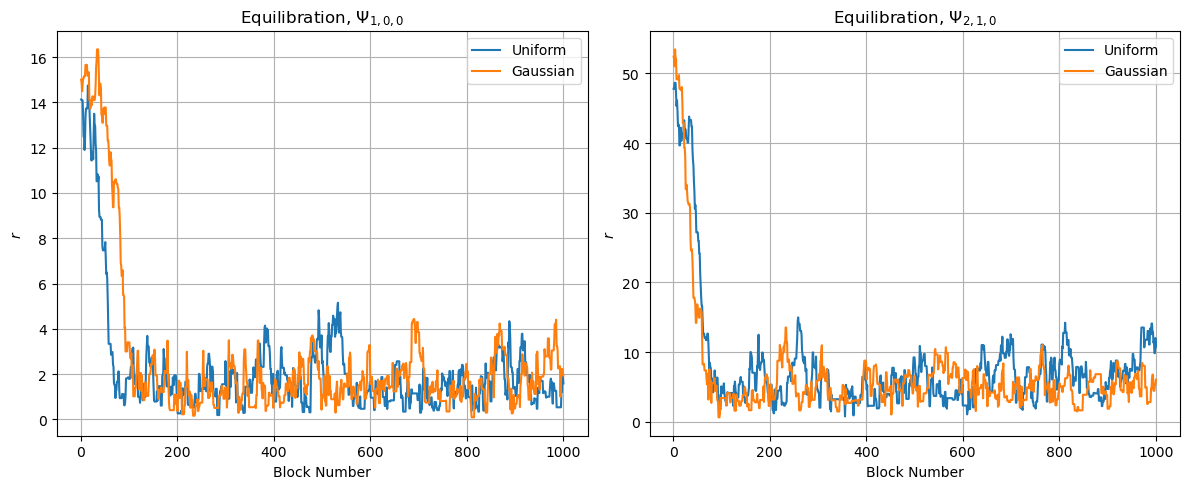

In [3]:
GS_eq = np.loadtxt(csv_path + "Ex5_1_GS_eq.csv", delimiter=",")
GS_eq_gauss = np.loadtxt(csv_path + "Ex5_1_GS_eq_gauss.csv", delimiter=",")

exc_eq = np.loadtxt(csv_path + "Ex5_1_2P_eq.csv", delimiter=",")
exc_eq_gauss = np.loadtxt(csv_path + "Ex5_1_2P_eq_gauss.csv", delimiter=",")

plt.subplot(1, 2, 1)
plt.plot(np.arange(1, np.size(GS_eq) + 1, 1), GS_eq, label = "Uniform")
plt.plot(np.arange(1, np.size(GS_eq_gauss) + 1, 1), GS_eq_gauss, label = "Gaussian")
plt.xlabel("Block Number")
plt.ylabel(r"$r$")
plt.title(r"Equilibration, $\Psi_{1,0,0}$")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, np.size(exc_eq) + 1, 1), exc_eq, label = "Uniform")
plt.plot(np.arange(1, np.size(exc_eq_gauss) + 1, 1), exc_eq_gauss, label = "Gaussian")
plt.xlabel("Block Number")
plt.ylabel(r"$r$")
plt.title(r"Equilibration, $\Psi_{2,1,0}$")
plt.grid(True)
plt.legend()

plt.gcf().set_size_inches(12,5)
plt.tight_layout()
plt.show()

As we can see, with both transition probabilities and in both orbitals, the instant radius stabilizes after less then $200$ steps. We can then observe that:

1. The equilibration process is successful and $1000$ equilibration steps should be more than enough.
2. The correlation is lost after around $200$ steps, so the number of steps per block in the simulation should also be greater then $200$

I can then proceed with the actual simulations, with the $x_0$ given by the last position of the equilibration step. In the simulation I used a total of $10^6$ steps divided into $100$ block ($10^4\ggg200$ steps per block).

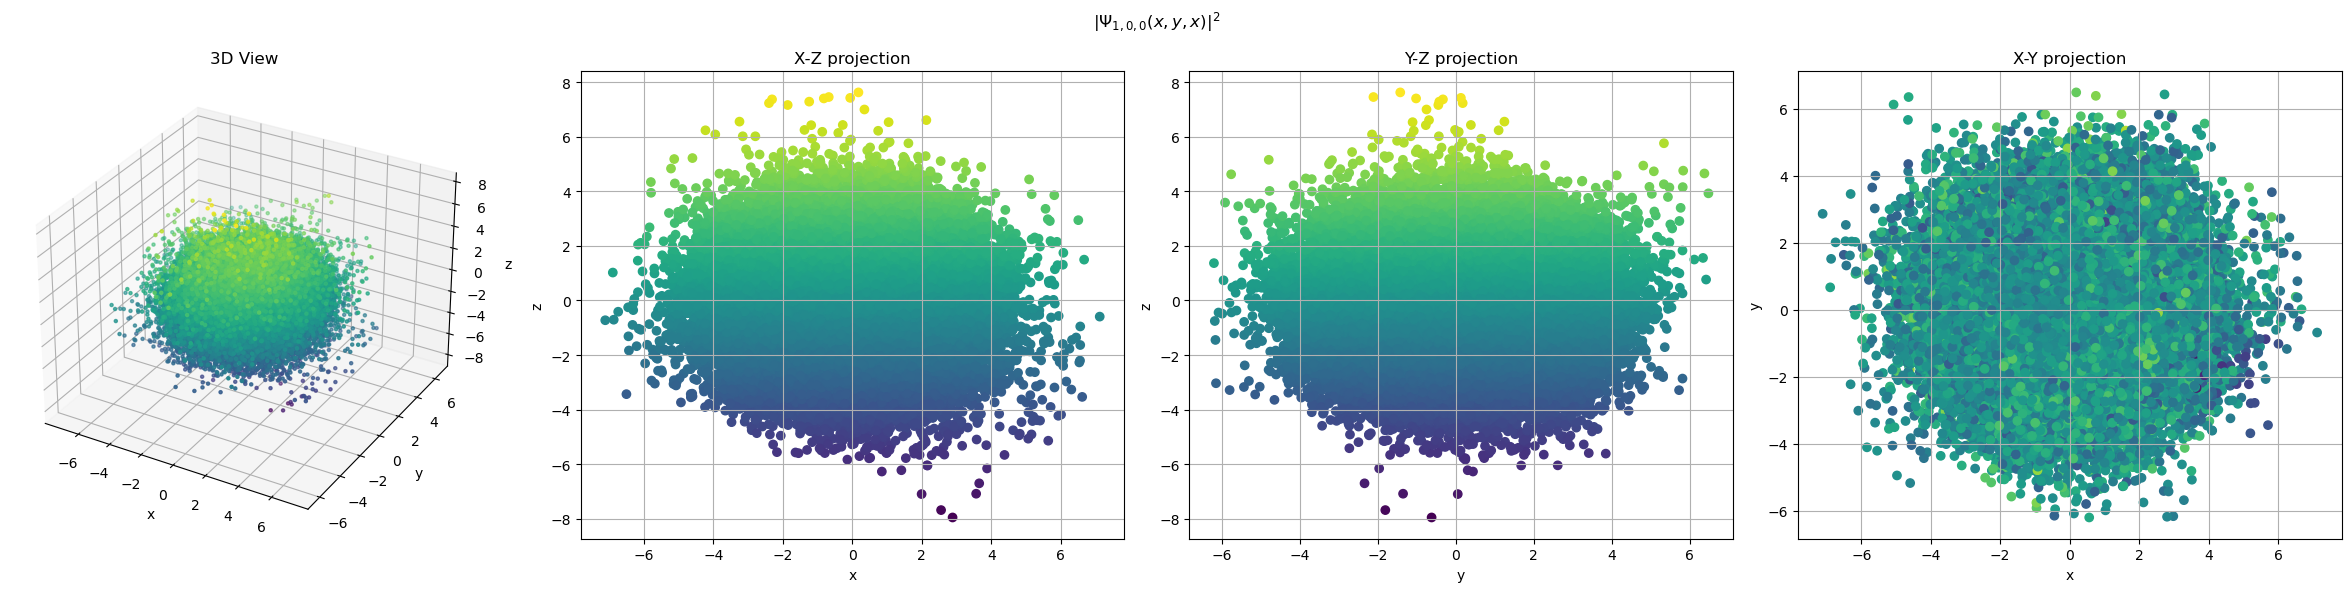

In [9]:
H_GS = np.loadtxt(csv_path + "Ex5_1_GS_pos.csv", delimiter=',')

X=H_GS[:,0]
Y=H_GS[:,1]
Z=H_GS[:,2]

ax = plt.subplot(1, 4, 1, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("3D View")

plt.subplot(1, 4, 2)
plt.scatter(X, Z, c = Z)
plt.xlabel('x')
plt.ylabel('z')
plt.title("X-Z projection")
plt.grid()

plt.subplot(1, 4, 3)
plt.scatter(Y, Z, c = Z)
plt.xlabel('y')
plt.ylabel('z')
plt.title("Y-Z projection")
plt.grid()

plt.subplot(1, 4, 4)
plt.scatter(X, Y, c = Z)
plt.xlabel('x')
plt.ylabel('y')
plt.title("X-Y projection")
plt.grid()

plt.suptitle(r"$|\Psi_{1,0,0}(x,y,x)|^2$")
plt.gcf().set_size_inches(24, 6)
plt.tight_layout()
plt.show()


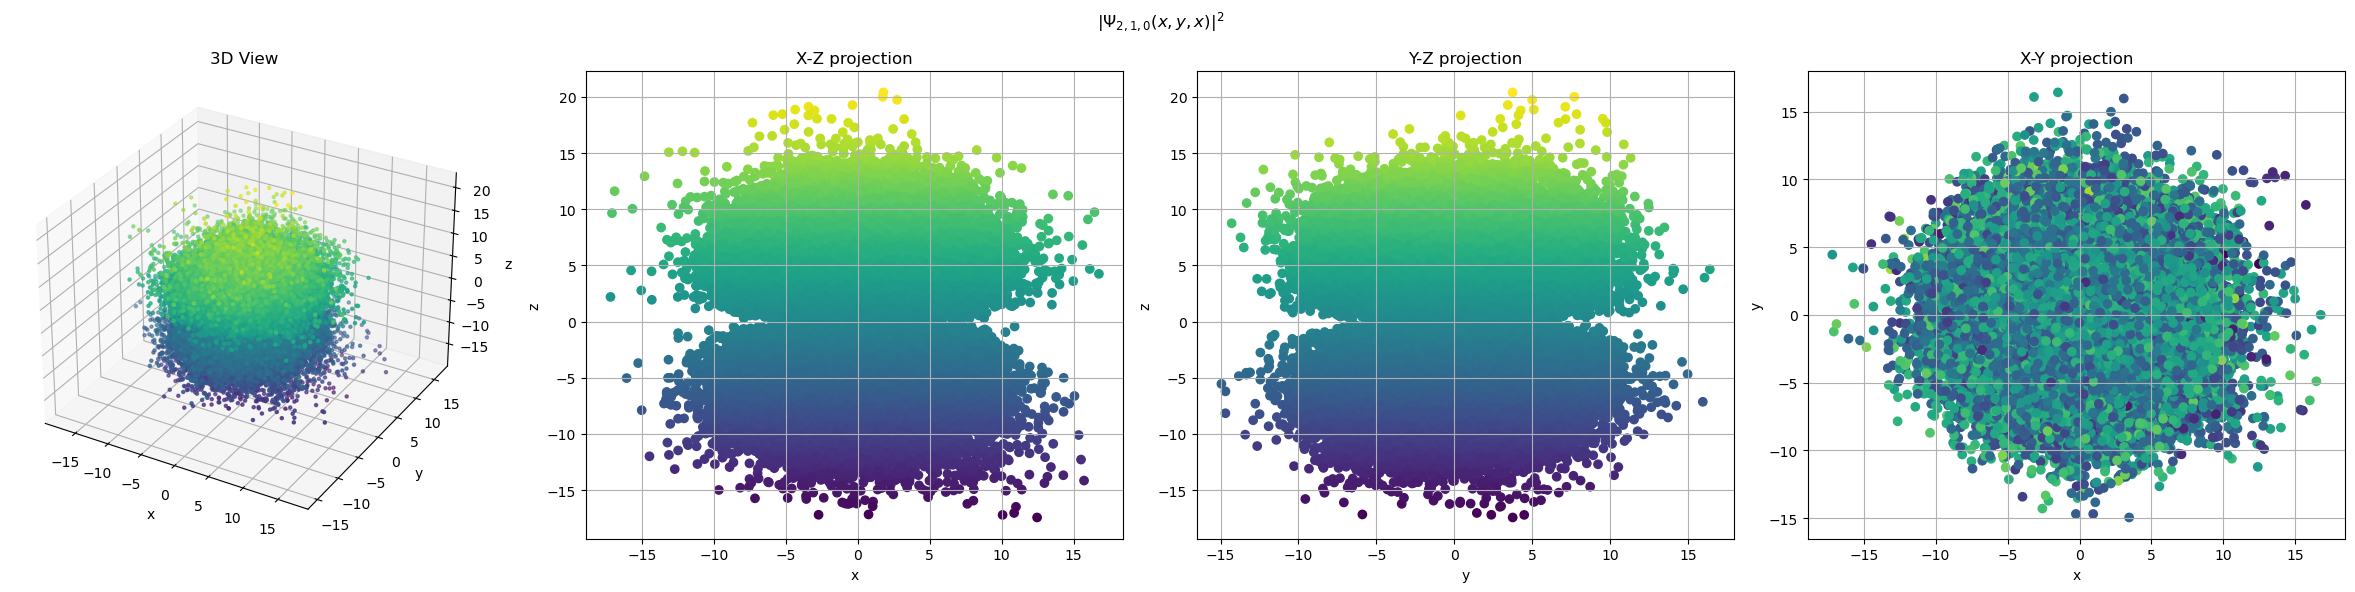

In [10]:
H_2P = np.loadtxt(csv_path + "Ex5_1_2P_pos.csv", delimiter=',')

X=H_2P[:,0]
Y=H_2P[:,1]
Z=H_2P[:,2]

ax = plt.subplot(1, 4, 1, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("3D View")

plt.subplot(1, 4, 2)
plt.scatter(X, Z, c = Z)
plt.xlabel('x')
plt.ylabel('z')
plt.title("X-Z projection")
plt.grid()

plt.subplot(1, 4, 3)
plt.scatter(Y, Z, c = Z)
plt.xlabel('y')
plt.ylabel('z')
plt.title("Y-Z projection")
plt.grid()

plt.subplot(1, 4, 4)
plt.scatter(X, Y, c = Z)
plt.xlabel('x')
plt.ylabel('y')
plt.title("X-Y projection")
plt.grid()

plt.suptitle(r"$|\Psi_{2,1,0}(x,y,x)|^2$")
plt.gcf().set_size_inches(24, 6)
plt.tight_layout()
plt.show()


The simulated orbitals, in both the GS and excited state, resembles the theoretical model, thus suggesting a correct simulation procedure. Note how in this simulation the starting radius is still set very far away from the origin but there is no sign of that in the result: we can then conclude again that the equilibration has worked as expected.

Finally I extracted from the simulation the expectation value for $r$, $\langle r \rangle$, using both a uniform and a gaussian transition probability.

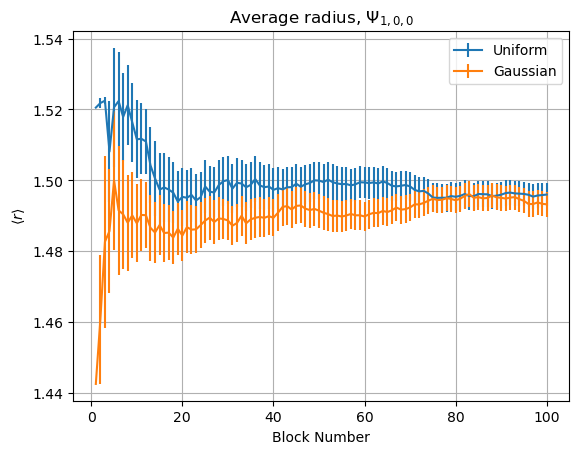

Theoretical expectation value: 1.50

Uniform:	Final r: 1.49595	Error: 0.00336769
Gaussian:	Final r: 1.49319	Error: 0.00350833


In [16]:
GS_r = np.loadtxt(csv_path + "Ex5_1_GS_r.csv", delimiter=",")
GS_r_gauss = np.loadtxt(csv_path + "Ex5_1_GS_r_gauss.csv", delimiter=",")

plt.errorbar(np.arange(1, np.size(GS_r[:,0]) + 1, 1), GS_r[:,0], yerr=GS_r[:,1], label = "Uniform")
plt.errorbar(np.arange(1, np.size(GS_r[:,0]) + 1, 1), GS_r_gauss[:,0], yerr=GS_r_gauss[:,1], label = "Gaussian")
plt.xlabel("Block Number")
plt.ylabel(r"$\langle r \rangle$")
plt.title(r"Average radius, $\Psi_{1,0,0}$")
plt.grid(True)
plt.legend()
plt.show()

print("Theoretical expectation value: 1.50\n")
print("Uniform:\tFinal r: {}\tError: {}".format(GS_r[-1,0], GS_r[-1,1]))
print("Gaussian:\tFinal r: {}\tError: {}".format(GS_r_gauss[-1,0], GS_r_gauss[-1,1]))

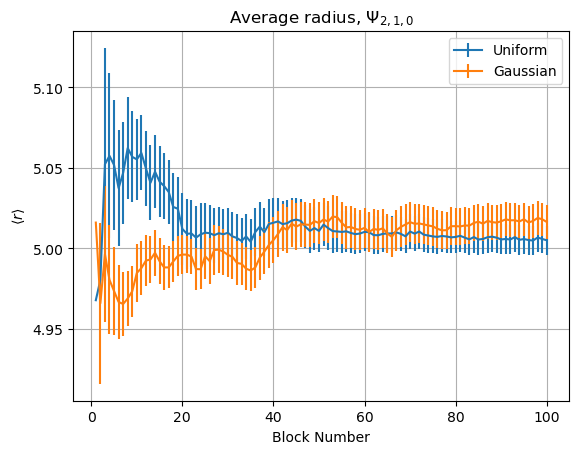

Theoretical expectation value: 5.00

Uniform:	Final r: 5.00497	Error: 0.00894922
Gaussian:	Final r: 5.01635	Error: 0.010351


In [15]:
exc_r = np.loadtxt(csv_path + "Ex5_1_2P_r.csv", delimiter=",")
exc_r_gauss = np.loadtxt(csv_path + "Ex5_1_2P_r_gauss.csv", delimiter=",")

plt.errorbar(np.arange(1, np.size(exc_r[:,0]) + 1, 1), exc_r[:,0], yerr=exc_r[:,1], label = "Uniform")
plt.errorbar(np.arange(1, np.size(exc_r[:,0]) + 1, 1), exc_r_gauss[:,0], yerr=exc_r_gauss[:,1], label = "Gaussian")
plt.xlabel("Block Number")
plt.ylabel(r"$\langle r \rangle$")
plt.title(r"Average radius, $\Psi_{2,1,0}$")
plt.grid(True)
plt.legend()
plt.show()

print("Theoretical expectation value: 5.00\n")
print("Uniform:\tFinal r: {}\tError: {}".format(exc_r[-1,0], exc_r[-1,1]))
print("Gaussian:\tFinal r: {}\tError: {}".format(exc_r_gauss[-1,0], exc_r_gauss[-1,1]))

The results for both orbitals are compatible within two standard deviation with the theoretical result, thus confirming the correct behavior of the code. Furthermore, the two sampling methods gave compatible results within one standard deviation and can then be considered as equally valid.

As a finale note I may say that while writing the code I also ran some simulations starting the equilibration procedure closer to the orbitals (namely $r_0^{(GS)} = 12.0$, $r_0^{(Exc)}=24.0$). This gave overall better results for $\langle r \rangle$ (compatibility with the theoretical value within one standard deviation in both cases), thus indicating that the equilibration starting point still has a small bias on the final results. This fact could be mitigated in two ways:

1. Starting closer to the orbitals: this is of course a valid solution but, if we didn't know what "closer to the orbital" means (i.e. we did not know the theoretical value of $\langle r \rangle$), we have to proceed by trial and error.
2. Increasing the number of equilibration steps: this should be the proper way of addressing the problem, but it still does not give us any hints (at least with the tools available up to this lecture) on how large the simulation steps should be in order to cancel this correlation. 